Part-1 :

Toy problem: Student Dropout

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 200  # number of students

# Generate features
gpa = np.round(np.random.normal(3.0, 0.5, n), 2)
majors = np.random.choice(['CS', 'Math', 'Economics', 'History'], n)
clubs = np.random.poisson(2, n)
attendance = np.random.uniform(50, 100, n)

# Dropout logic: low GPA & low attendance
dropout_prob = (gpa < 2.5) & (attendance < 70)
dropout = np.where(dropout_prob, 1, 0)

# Create DataFrame
df = pd.DataFrame({
    'GPA': gpa,
    'Major': majors,
    'Clubs': clubs,
    'Attendance': np.round(attendance, 1),
    'Dropout': dropout
})

print(df.head())

# Save to CSV for later use
df.to_csv("students.csv", index=False)

    GPA    Major  Clubs  Attendance  Dropout
0  3.25     Math      4        82.6        0
1  2.93     Math      0        91.5        0
2  3.32       CS      0        60.3        0
3  3.76  History      0        50.5        0
4  2.88       CS      0        56.8        0


In [2]:
df.describe()

,GPA,Clubs,Attendance,Dropout
count,200.000000,200.000000,200.000000,200.000000
mean,2.979850,1.890000,75.700500,0.075000
std,0.465502,1.399174,14.900418,0.264052
min,1.690000,0.000000,50.500000,0.000000
25%,2.647500,1.000000,61.850000,0.000000
50%,2.995000,2.000000,76.150000,0.000000
75%,3.252500,3.000000,89.075000,0.000000
max,4.360000,8.000000,99.900000,1.000000


This suggests that the average dropout percentage is 7.5%, finding out dropouts by Major will offer more insights

In [3]:
df.groupby('Major')['Dropout'].mean()

Major
CS           0.040816
Economics    0.125000
History      0.089286
Math         0.054545
Name: Dropout, dtype: float64

In [4]:
df.groupby('Major')['Dropout'].value_counts()

Major      Dropout
CS         0          47
           1           2
Economics  0          35
           1           5
History    0          51
           1           5
Math       0          52
           1           3
Name: count, dtype: int64

This shows that the Economics department is having the dropout problem.

In [5]:
df['Major'].value_counts()

Major
History      56
Math         55
CS           49
Economics    40
Name: count, dtype: int64

On to club participation

In [6]:
df.groupby('Major')['Clubs'].value_counts()

Major      Clubs
CS         1        20
           0         9
           3         9
           2         6
           5         3
           4         2
Economics  2        11
           3        10
           0         8
           1         8
           4         3
History    1        19
           0        10
           2        10
           3        10
           4         5
           5         1
           6         1
Math       2        20
           1        12
           3        10
           4         6
           0         4
           5         2
           8         1
Name: count, dtype: int64

In [7]:
df.groupby('Major')['Clubs'].mean()

Major
CS           1.673469
Economics    1.800000
History      1.785714
Math         2.254545
Name: Clubs, dtype: float64

In [8]:
df.groupby('Clubs')['Dropout'].value_counts()

Clubs  Dropout
0      0          28
       1           3
1      0          52
       1           7
2      0          44
       1           3
3      0          38
       1           1
4      0          15
       1           1
5      0           6
6      0           1
8      0           1
Name: count, dtype: int64

In [9]:
df.groupby('Clubs')['Dropout'].mean()

Clubs
0    0.096774
1    0.118644
2    0.063830
3    0.025641
4    0.062500
5    0.000000
6    0.000000
8    0.000000
Name: Dropout, dtype: float64

This suggests that - the higher the club participation, the lower the dropout chances

On to Attendance

In [16]:
attendance_bins = [50, 70, 100]
attendance_labels = ['50-70', '70+']

df['Attendance_Group'] = pd.cut(df['Attendance'], bins=attendance_bins, labels=attendance_labels, right=False, include_lowest=True)

dropout_by_attendance_group = df.groupby('Attendance_Group')['Dropout'].value_counts()

print(dropout_by_attendance_group)


import warnings
warnings.filterwarnings("ignore")

Attendance_Group  Dropout
50-70             0           64
                  1           15
70+               0          121
                  1            0
Name: count, dtype: int64


This follows from the dropout logic, students with attendance < 70% are taking dropout

In [17]:
df.groupby('Dropout')['GPA'].mean()

Dropout
0    3.036811
1    2.277333
Name: GPA, dtype: float64

Students with GPA < 2.5 are probable dropouts 

Insights:

1. Economics major has the highest dropout ratio
2. Attendance < 70, probable dropouts
3. The higher the Club participation, the lower the chances of being a dropout
4. The lower the GPA (< 2.5), the higher the chances of being a dropout


Actionable items:

1. Address the problem with Economics major,like.. Redesigning course structure, activating placement cell, improving the quality of the faculty, maintaining decent student-teacher ratio etc.

2. From the other three insights, increased engagememt with curricular (assessed through GPA and Attendance) and co-curricular ( Club participation) activites might address the dropout problem. - try to increase student participation

-------------------------------------------------------------------------------------------------------------------------------

Part-2:

Problem Statement: Simulate 1000 house sales with prices, sizes, number of bedrooms, and distances to city center. Different distributions for each feature. Find strongest correlations with price.

In [ ]:
import numpy as np
import pandas as pd

# Generate random data for house sales
np.random.seed(42)  # For reproducibility with the given seed
n = 1000 # Number of house sales

# Generate features
# 1. House size (in sq ft), normal distribution (mean ~1200, std ~300 for Hyderabad)
house_size = np.round(np.random.normal(1200, 300, n), 0)
house_size = np.clip(house_size, 400, 3000)  # Clamp to realistic range

# 2. Number of bedrooms, random choice among [1, 2, 3]
bedrooms = np.random.choice([1, 2, 3], n, p=[0.2, 0.5, 0.3])

# 3. Distance to city center (in km), lognormal distribution (mean ~7km, std ~5km)
distance = np.round(np.random.lognormal(1.8, 0.5, n), 1)
distance = np.clip(distance, 1, 30)  # Clamp to realistic range

# 4. Price (in lakhs), normal distribution, correlated with other features
# Base price per sq ft decreases with distance, increases with bedrooms
base_price_per_sqft = 5_000 - (distance * 100) + (bedrooms * 200)
price = house_size * base_price_per_sqft / 100_000  # Convert to lakhs
price = price + np.random.normal(0, 5, n)  # Add some noise
price = np.round(price, 2)
price = np.clip(price, 20, 300)  # Clamp to realistic range

# Create DataFrame
df = pd.DataFrame({
    'Size_sqft': house_size,
    'Bedrooms': bedrooms,
    'Distance_km': distance,
    'Price_lakhs': price
})

# Save to CSV
df.to_csv("house_sales.csv", index=False)
print(df.head())

   Size_sqft  Bedrooms  Distance_km  Price_lakhs
0     1349.0         3          6.5        69.14
1     1159.0         1          2.5        52.74
2     1394.0         3          7.1        70.94
3     1657.0         1          5.6        72.29
4     1130.0         3          4.8        55.77


In [19]:
correlations = df.corr()['Price_lakhs']
print(correlations)

Size_sqft      0.891491
Bedrooms       0.122005
Distance_km   -0.273833
Price_lakhs    1.000000
Name: Price_lakhs, dtype: float64


In [20]:
# Exclude the correlation of Price_lakhs with itself
correlations_without_price = correlations.drop('Price_lakhs')

# Sort by the absolute value of the correlation in descending order
ranked_correlations = correlations_without_price.abs().sort_values(ascending=False)

print("Ranked correlations with Price_lakhs (from strongest to weakest):")
print(ranked_correlations)

Ranked correlations with Price_lakhs (from strongest to weakest):
Size_sqft      0.891491
Distance_km    0.273833
Bedrooms       0.122005
Name: Price_lakhs, dtype: float64


Price has the strongest correlation with Size_sqft

In [21]:
df.describe()

,Size_sqft,Bedrooms,Distance_km,Price_lakhs
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1205.987000,1.976000,6.860300,56.787750
std,293.225019,0.808751,3.612856,15.447053
min,400.000000,1.000000,1.300000,20.000000
25%,1005.750000,1.000000,4.400000,46.132500
50%,1207.500000,2.000000,6.100000,56.310000
75%,1394.250000,3.000000,8.500000,66.632500
max,2356.000000,3.000000,29.900000,109.220000


A typical house of size 1206 sqft(approx),with 2 bedrooms, located at a distance of 7km from the core city costs around 57 lakhs. 

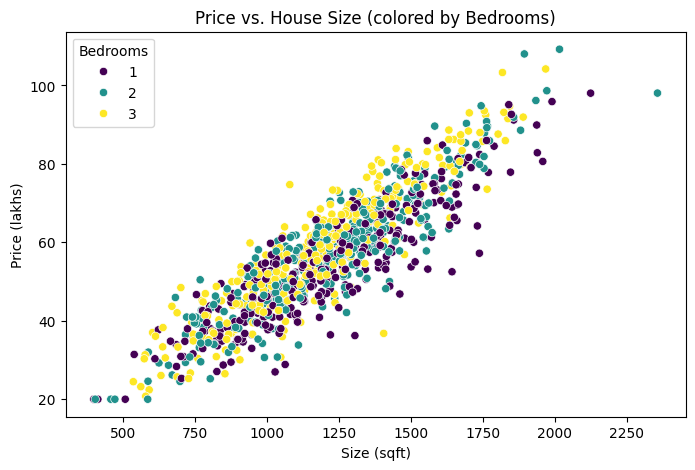

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#Price vs. Size
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size_sqft', y='Price_lakhs', hue='Bedrooms', data=df, palette='viridis')
plt.title('Price vs. House Size (colored by Bedrooms)')
plt.xlabel('Size (sqft)')
plt.ylabel('Price (lakhs)')
plt.show()

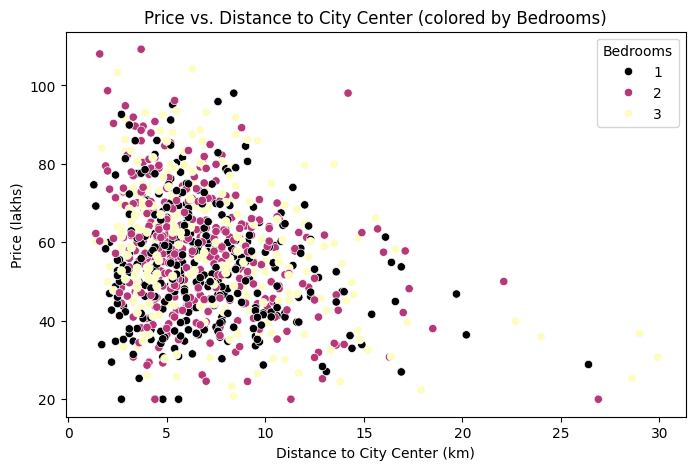

In [15]:
# 5. Price vs. Distance
plt.figure(figsize=(8,5))
sns.scatterplot(x='Distance_km', y='Price_lakhs', hue='Bedrooms', data=df, palette='magma')
plt.title('Price vs. Distance to City Center (colored by Bedrooms)')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Price (lakhs)')
plt.show()

Actionable Insights:

1. The larger the size of a house, the higher the price goes up
2. The closer the house to the city, the higher the price it commands
